In [1]:
%pip install pandas yfinance openpyxl matplotlib seaborn

In [2]:
# Step 1: Fetch Stock Data (Real-time & Historical)
import yfinance as yf
import pandas as pd
from datetime import datetime

In [13]:
# Get user input for stock symbol
stock_symbol = input("Enter stock symbol (e.g., AAPL, TSLA, MSFT): ").upper()

Enter stock symbol (e.g., AAPL, TSLA, MSFT): AAPL


In [14]:
# Get start and end date in YYYY-MM-DD format (single input line)
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

Enter start date (YYYY-MM-DD): 2024-01-01
Enter end date (YYYY-MM-DD): 2025-06-30


In [15]:
# Extract years for financial data filtering
start_year, end_year = int(start_date[:4]), int(end_date[:4])

In [16]:
# Download stock price data based on period
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

/tmp/ipython-input-16-3093565088.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [17]:
# Fetch financial statements
ticker = yf.Ticker(stock_symbol)
# Get financial statements (Income Statement, Balance Sheet, Cash Flow)
income_statement = ticker.financials.transpose()
balance_sheet = ticker.balance_sheet.transpose()
cash_flow = ticker.cashflow.transpose()

In [18]:
# Extract only financial data within user-defined period
income_statement = income_statement.loc[
    (income_statement.index.year >= start_year) & (income_statement.index.year <= end_year)
]

balance_sheet = balance_sheet.loc[
    (balance_sheet.index.year >= start_year) & (balance_sheet.index.year <= end_year)
]

cash_flow = cash_flow.loc[
    (cash_flow.index.year >= start_year) & (cash_flow.index.year <= end_year)
]

In [19]:
# Display Results
print(f"\nStock Price Data for {stock_symbol} from {start_date} to {end_date}:")
print(stock_data.head())

print(f"\nIncome Statement ({start_year}-{end_year}):")
print(income_statement)

print(f"\nBalance Sheet ({start_year}-{end_year}):")
print(balance_sheet)

print(f"\nCash Flow Statement ({start_year}-{end_year}):")
print(cash_flow)


Stock Price Data for AAPL from 2024-01-01 to 2025-06-30:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.290405  187.070052  182.553128  185.789422  82488700
2024-01-03  182.910507  184.528662  182.096461  182.880727  58414500
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600
2024-01-05  179.862823  181.431339  178.860172  180.666948  62303300
2024-01-08  184.210983  184.250701  180.180502  180.766209  59144500

Income Statement (2024-2025):
           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-09-30                         0.0              0.241    134661000000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2024-09-30                                      93736000000.0           

           Reconciled Depreciation Reconciled Cost Of

In [20]:
from IPython.display import display

In [21]:
# Function to format section titles
def print_section_title(title):
    print("\n" + "="*50)  # Separator Line
    print(f" 📊 {title}")  # Section Title with an Icon
    print("="*50 + "\n")  # Separator Line

# Display Stock Price Data
print_section_title("Stock Price Data")
display(stock_data.head())

# Display Income Statement
print_section_title("Income Statement")
display(income_statement)

# Display Balance Sheet
print_section_title("Balance Sheet")
display(balance_sheet)

# Display Cash Flow Statement
print_section_title("Cash Flow Statement")
display(cash_flow)


 📊 Stock Price Data



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210983,184.250701,180.180502,180.766209,59144500



 📊 Income Statement



,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,NaN,NaN,123216000000.0,57467000000.0,31370000000.0,26097000000.0,180683000000.0,210352000000.0,391035000000.0,391035000000.0



 📊 Balance Sheet



,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Other Current Assets,Inventory,Receivables,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2024-09-30,NaN,15116786000.0,15116786000.0,76686000000.0,106629000000.0,56950000000.0,163579000000.0,-23405000000.0,56950000000.0,NaN,...,14287000000.0,7286000000.0,66243000000.0,32833000000.0,33410000000.0,65171000000.0,35228000000.0,29943000000.0,2744000000.0,27199000000.0



 📊 Cash Flow Statement



,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,108807000000.0,-94949000000.0,-9958000000.0,0.0,NaN,-9447000000.0,NaN,26102000000.0,29943000000.0,30737000000.0,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0


In [22]:
# Calculate Moving Averages
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

In [23]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

stock_data['RSI'] = calculate_rsi(stock_data)

In [24]:
# Calculate MACD (12-day EMA - 26-day EMA)
stock_data['EMA_12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['EMA_26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['EMA_12'] - stock_data['EMA_26']

In [25]:
# Calculate Bollinger Bands
stock_data['Bollinger_Upper'] = stock_data['Close'].rolling(20).mean() + (stock_data['Close'].rolling(20).std() * 2)
stock_data['Bollinger_Lower'] = stock_data['Close'].rolling(20).mean() - (stock_data['Close'].rolling(20).std() * 2)

In [26]:
# Display processed data
from IPython.display import display
print("Stock Data with Technical Indicators:")
display(stock_data.tail(10))

Stock Data with Technical Indicators:


Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,RSI,EMA_12,EMA_26,MACD,Bollinger_Upper,Bollinger_Lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,52.302875,200.638447,202.210394,-1.571946,209.433023,194.360977
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838228,46.048545,200.297147,201.929624,-1.632476,207.511633,194.998368
2025-06-17,195.639999,198.389999,195.210007,197.199997,38856200,201.355419,223.687944,40.523397,199.580663,201.463725,-1.883062,206.258771,194.937229
2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700,201.662572,223.525919,43.441038,199.119023,201.101968,-1.982945,205.190411,194.977590
2025-06-20,201.000000,201.699997,196.860001,198.240005,96813500,202.238688,223.389930,50.256751,199.408404,201.094415,-1.686011,205.068588,194.990413
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300,202.296896,223.287481,49.653505,199.730188,201.124458,-1.394270,205.083753,194.989248
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000,202.499484,223.188599,44.787641,199.817852,201.063388,-1.245536,204.809062,195.766939
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700,202.572874,223.088394,47.849812,200.085874,201.100173,-1.014299,204.911832,195.799168


In [27]:
# Extract financial ratios from Yahoo Finance API
stock_data['P/E'] = ticker.info.get('trailingPE', None)
stock_data['ROE'] = ticker.info.get('returnOnEquity', None)
stock_data['Debt_to_Equity'] = ticker.info.get('debtToEquity', None)

# Display updated dataset
print("Stock Data with Financial Ratios:")
display(stock_data[['Close', 'P/E', 'ROE', 'Debt_to_Equity']].tail(10))

Stock Data with Financial Ratios:


Price,Close,P/E,ROE,Debt_to_Equity
Ticker,AAPL,,,
Date,,,,
2025-06-13,196.449997,33.21151,1.38015,146.994
2025-06-16,198.419998,33.21151,1.38015,146.994
2025-06-17,195.639999,33.21151,1.38015,146.994
2025-06-18,196.580002,33.21151,1.38015,146.994
2025-06-20,201.000000,33.21151,1.38015,146.994
2025-06-23,201.500000,33.21151,1.38015,146.994
2025-06-24,200.300003,33.21151,1.38015,146.994
2025-06-25,201.559998,33.21151,1.38015,146.994


In [28]:
# Select relevant features
features = ['SMA_50', 'SMA_200', 'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'P/E', 'ROE', 'Debt_to_Equity']
final_data = stock_data[features].dropna()

# Display the final dataset
print("Final Feature Dataset for Machine Learning:")
display(final_data.tail(10))

Final Feature Dataset for Machine Learning:


Price,SMA_50,SMA_200,RSI,MACD,Bollinger_Upper,Bollinger_Lower,P/E,ROE,Debt_to_Equity
Ticker,,,,,,,,,
Date,,,,,,,,,
2025-06-13,201.295363,223.982284,52.302875,-1.571946,209.433023,194.360977,33.21151,1.38015,146.994
2025-06-16,201.205285,223.838228,46.048545,-1.632476,207.511633,194.998368,33.21151,1.38015,146.994
2025-06-17,201.355419,223.687944,40.523397,-1.883062,206.258771,194.937229,33.21151,1.38015,146.994
2025-06-18,201.662572,223.525919,43.441038,-1.982945,205.190411,194.977590,33.21151,1.38015,146.994
2025-06-20,202.238688,223.389930,50.256751,-1.686011,205.068588,194.990413,33.21151,1.38015,146.994
2025-06-23,202.296896,223.287481,49.653505,-1.394270,205.083753,194.989248,33.21151,1.38015,146.994
2025-06-24,202.499484,223.188599,44.787641,-1.245536,204.809062,195.766939,33.21151,1.38015,146.994
2025-06-25,202.572874,223.088394,47.849812,-1.014299,204.911832,195.799168,33.21151,1.38015,146.994


In [29]:
# Select relevant features
features = ['SMA_50', 'SMA_200', 'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'P/E', 'ROE', 'Debt_to_Equity']
final_data = stock_data[features].dropna()

In [30]:
# Save the processed data to an Excel file
excel_filename = "Stock_Analysis.xlsx"
with pd.ExcelWriter(excel_filename) as writer:
    stock_data.to_excel(writer, sheet_name="Stock Data")
    income_statement.to_excel(writer, sheet_name="Income Statement")
    balance_sheet.to_excel(writer, sheet_name="Balance Sheet")
    cash_flow.to_excel(writer, sheet_name="Cash Flow")
    final_data.to_excel(writer, sheet_name="Processed Data")

In [31]:
print("\n📊 Stock Price Data:")
display(stock_data)

print("\n📊 Processed Data:")
display(final_data)

# Notify user about the exported file
print(f"\n✅ Stock Analysis Report has been saved as '{excel_filename}'.")


📊 Stock Price Data:


Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,RSI,EMA_12,EMA_26,MACD,Bollinger_Upper,Bollinger_Lower,P/E,ROE,Debt_to_Equity
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700,NaN,NaN,NaN,184.290405,184.290405,0.000000,NaN,NaN,33.21151,1.38015,146.994
2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500,NaN,NaN,NaN,184.078113,184.188191,-0.110077,NaN,NaN,33.21151,1.38015,146.994
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600,NaN,NaN,NaN,183.541102,183.921476,-0.380374,NaN,NaN,33.21151,1.38015,146.994
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300,NaN,NaN,NaN,182.975213,183.620835,-0.645622,NaN,NaN,33.21151,1.38015,146.994
2024-01-08,184.210983,184.250701,180.180502,180.766209,59144500,NaN,NaN,NaN,183.165331,183.664550,-0.499218,NaN,NaN,33.21151,1.38015,146.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300,202.296896,223.287481,49.653505,199.730188,201.124458,-1.394270,205.083753,194.989248,33.21151,1.38015,146.994
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000,202.499484,223.188599,44.787641,199.817852,201.063388,-1.245536,204.809062,195.766939,33.21151,1.38015,146.994



📊 Processed Data:


Price,SMA_50,SMA_200,RSI,MACD,Bollinger_Upper,Bollinger_Lower,P/E,ROE,Debt_to_Equity
Ticker,,,,,,,,,
Date,,,,,,,,,
2024-10-16,223.847563,198.335540,55.546871,1.934316,232.893387,221.665778,33.21151,1.38015,146.994
2024-10-17,224.297433,198.570772,55.662358,2.039398,233.336809,221.549207,33.21151,1.38015,146.994
2024-10-18,224.734629,198.827104,52.767042,2.325041,234.399930,221.163705,33.21151,1.38015,146.994
2024-10-21,225.142993,199.102425,66.655889,2.639988,235.687179,220.873951,33.21151,1.38015,146.994
2024-10-22,225.508309,199.378280,64.702099,2.807370,236.646653,220.760504,33.21151,1.38015,146.994
...,...,...,...,...,...,...,...,...,...
2025-06-23,202.296896,223.287481,49.653505,-1.394270,205.083753,194.989248,33.21151,1.38015,146.994
2025-06-24,202.499484,223.188599,44.787641,-1.245536,204.809062,195.766939,33.21151,1.38015,146.994



✅ Stock Analysis Report has been saved as 'Stock_Analysis.xlsx'.


In [32]:
# for multiple stocks:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.utils import resample
from IPython.display import display

# ✅ User Input for Stock Symbols (Comma-Separated)
stock_input = input("Enter Stock Symbols (comma-separated, e.g., AAPL, MSFT, TSLA): ")
stock_list = [stock.strip().upper() for stock in stock_input.split(",")]

# ✅ User Inputs for Moving Average Periods
short_ma_period = int(input("Enter Shorter Moving Average Period (e.g., 20): "))
long_ma_period = int(input("Enter Longer Moving Average Period (e.g., 100): "))

# ✅ User Inputs for RSI Buy/Sell Ranges
rsi_buy_threshold = int(input("Enter RSI Buy Threshold (e.g., 45): "))
rsi_sell_threshold = int(input("Enter RSI Sell Threshold (e.g., 55): "))

# ✅ Store Results
all_results = []

# ✅ Iterate Through Each Stock
for stock in stock_list:
    print(f"\n📊 Analyzing {stock}...")

    # ✅ Fetch Data
    data = yf.download(stock, start=start_date, end=end_date)

    # ✅ Compute Moving Averages
    data[f'SMA_{short_ma_period}'] = data['Close'].rolling(window=short_ma_period, min_periods=1).mean()
    data[f'SMA_{long_ma_period}'] = data['Close'].rolling(window=long_ma_period, min_periods=1).mean()

    # ✅ Compute RSI
    def calculate_rsi(series, period=14):
        delta = series.diff()
        gain = delta.clip(lower=0).rolling(window=period, min_periods=1).mean()
        loss = -delta.clip(upper=0).rolling(window=period, min_periods=1).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    data['RSI'] = calculate_rsi(data['Close'])

    # ✅ Compute MACD
    def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
        short_ema = series.ewm(span=short_window, adjust=False).mean()
        long_ema = series.ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # ✅ Define Buy/Sell Signals
    data['Buy_Signal'] = (
        (data[f'SMA_{short_ma_period}'] > data[f'SMA_{long_ma_period}']) &
        (data['RSI'] < rsi_buy_threshold) &
        (data['MACD'] > data['Signal_Line'])
    )

    data['Sell_Signal'] = (
        (data[f'SMA_{short_ma_period}'] < data[f'SMA_{long_ma_period}']) &
        (data['RSI'] > rsi_sell_threshold) &
        (data['MACD'] < data['Signal_Line'])
    )

    # ✅ Drop NaN Values
    data_clean = data.dropna()

    # ✅ Count Buy/Sell Signals
    num_buy = data_clean['Buy_Signal'].sum()
    num_sell = data_clean['Sell_Signal'].sum()

    # ✅ Bootstrap Performance Test
    n_iterations = 1000
    sample_size = int(len(data_clean) * 0.8)
    bootstrap_results = []

    for _ in range(n_iterations):
        sample = resample(data_clean, n_samples=sample_size, replace=True)
        buy_prices = sample[sample['Buy_Signal']]['Close']
        sell_prices = sample[sample['Sell_Signal']]['Close']

        # Match Buy/Sell Pairs
        if len(sell_prices) > len(buy_prices):
            sell_prices = sell_prices.iloc[:len(buy_prices)]
        elif len(buy_prices) > len(sell_prices):
            buy_prices = buy_prices.iloc[:len(sell_prices)]

        # Calculate Profit Per Trade
        profits = sell_prices.values - buy_prices.values
        avg_profit = np.mean(profits) if len(profits) > 0 else 0
        bootstrap_results.append(avg_profit)

    # ✅ Compute Performance Metrics
    expected_profit = np.mean(bootstrap_results)
    profit_std = np.std(bootstrap_results)
    win_rate = np.sum(np.array(bootstrap_results) > 0) / n_iterations * 100

    # ✅ Store Results
    all_results.append([stock, num_buy, num_sell, expected_profit, profit_std, win_rate])

# ✅ Convert Results to DataFrame
results_df = pd.DataFrame(all_results, columns=["Stock", "Buy Signals", "Sell Signals", "Avg Profit Per Trade", "Profit Std Dev", "Win Rate"])

# ✅ Display Results in Jupyter Notebook
print("\n📊 Final Trading Performance Results:")
display(results_df)

# ✅ Save to Excel (Optional)
excel_filename = "Stock_Trading_Performance.xlsx"
results_df.to_excel(excel_filename, index=False)
print(f"✅ Results saved to {excel_filename}")


Enter Stock Symbols (comma-separated, e.g., AAPL, MSFT, TSLA): AAPL,MSFT
Enter Shorter Moving Average Period (e.g., 20): 20
Enter Longer Moving Average Period (e.g., 100): 100
Enter RSI Buy Threshold (e.g., 45): 45
Enter RSI Sell Threshold (e.g., 55): 55


/tmp/ipython-input-32-514001269.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


📊 Analyzing AAPL...



📊 Analyzing MSFT...


/tmp/ipython-input-32-514001269.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed



📊 Final Trading Performance Results:


,Stock,Buy Signals,Sell Signals,Avg Profit Per Trade,Profit Std Dev,Win Rate
0,AAPL,1,2,-12.013544,13.933302,0.0
1,MSFT,0,4,0.000000,0.000000,0.0


✅ Results saved to Stock_Trading_Performance.xlsx


/tmp/ipython-input-33-3480669998.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Using stock: AAPL, Start Date: 2024-01-01, End Date: 2025-06-30
Enter Shorter Moving Average Period (e.g., 20): 20
Enter Longer Moving Average Period (e.g., 100): 100
Enter RSI Buy Threshold (e.g., 45): 45
Enter RSI Sell Threshold (e.g., 55): 55


/tmp/ipython-input-33-3480669998.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Using stock: AAPL, Start Date: 2024-01-01, End Date: 2025-06-30
Using Moving Averages: 20-day & 100-day
RSI Buy < 45, RSI Sell > 55

📊 Buy Signals Found: 1
📊 Sell Signals Found: 2

📊 Latest Stock Data with Buy/Sell Signals:


Price,Close,High,Low,Open,Volume,SMA_20,SMA_100,RSI,MACD,Signal_Line,Buy_Signal,Sell_Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.897000,215.533418,52.302875,-1.571946,-1.231530,False,False
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.255000,215.284704,46.048545,-1.632476,-1.311719,False,False
2025-06-17,195.639999,198.389999,195.210007,197.199997,38856200,200.598000,215.009886,40.523397,-1.883062,-1.425988,False,False
2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700,200.084000,214.753248,43.441038,-1.982945,-1.537379,False,False
2025-06-20,201.000000,201.699997,196.860001,198.240005,96813500,200.029501,214.470179,50.256751,-1.686011,-1.567106,False,False
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300,200.036501,214.108313,49.653505,-1.394270,-1.532539,False,False
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000,200.288000,213.723473,44.787641,-1.245536,-1.475138,False,False
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700,200.355500,213.368891,47.849812,-1.014299,-1.382970,False,False


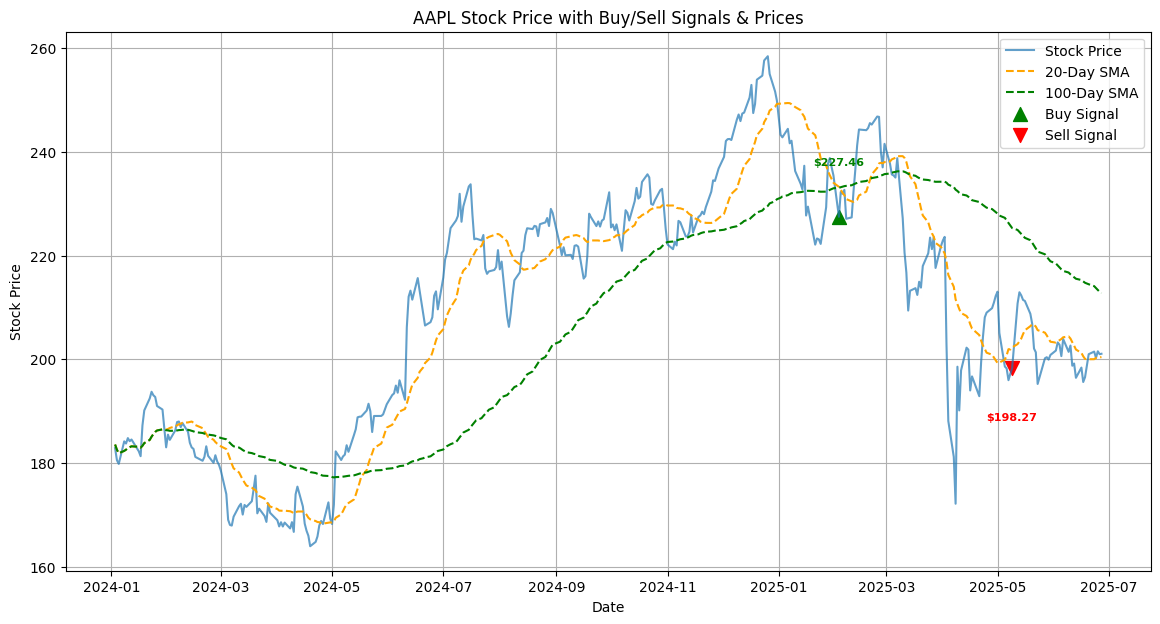

Please Enter Number of Samples:10
 Expected Profit Per Trade: $-19.79
 Profit Standard Deviation: $12.99
 Win Rate: 0.00%

 All Buy Signals:


Price,Buy Price
Ticker,AAPL
Date,
2025-02-03,227.461304



📊 All Sell Signals:


Price,Sell Price
Ticker,AAPL
Date,
2025-05-09,198.270004
2025-05-28,200.419998


In [33]:
# Focusing on "One Stock"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

print(f"Using stock: {stock_symbol}, Start Date: {start_date}, End Date: {end_date}")

data = yf.download(stock_symbol, start=start_date, end=end_date)

# ✅ User Inputs for Moving Average Periods
short_ma_period = int(input("Enter Shorter Moving Average Period (e.g., 20): "))
long_ma_period = int(input("Enter Longer Moving Average Period (e.g., 100): "))

# ✅ User Inputs for RSI Buy/Sell Ranges
rsi_buy_threshold = int(input("Enter RSI Buy Threshold (e.g., 45): "))
rsi_sell_threshold = int(input("Enter RSI Sell Threshold (e.g., 55): "))

print(f"\nUsing stock: {stock_symbol}, Start Date: {start_date}, End Date: {end_date}")
print(f"Using Moving Averages: {short_ma_period}-day & {long_ma_period}-day")
print(f"RSI Buy < {rsi_buy_threshold}, RSI Sell > {rsi_sell_threshold}")

# ✅ Fetch Stock Data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# ✅ Compute Moving Averages (User Defined)
data[f'SMA_{short_ma_period}'] = data['Close'].rolling(window=short_ma_period, min_periods=1).mean()
data[f'SMA_{long_ma_period}'] = data['Close'].rolling(window=long_ma_period, min_periods=1).mean()

# ✅ Compute RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(window=period, min_periods=1).mean()
    loss = -delta.clip(upper=0).rolling(window=period, min_periods=1).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data['Close'])

# ✅ Compute MACD
def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

# ✅ Define Buy/Sell Signals (User Defined RSI Thresholds)
data['Buy_Signal'] = (
    (data[f'SMA_{short_ma_period}'] > data[f'SMA_{long_ma_period}']) &
    (data['RSI'] < rsi_buy_threshold) &
    (data['MACD'] > data['Signal_Line'])
)

data['Sell_Signal'] = (
    (data[f'SMA_{short_ma_period}'] < data[f'SMA_{long_ma_period}']) &
    (data['RSI'] > rsi_sell_threshold) &
    (data['MACD'] < data['Signal_Line'])
)

# ✅ Drop NaN Values
data_clean = data.dropna()

# ✅ Print Debugging Info (Buy/Sell Signal Counts)
num_buy = data_clean['Buy_Signal'].sum()
num_sell = data_clean['Sell_Signal'].sum()
print(f"\n📊 Buy Signals Found: {num_buy}")
print(f"📊 Sell Signals Found: {num_sell}")

# ✅ Display Latest Stock Data with Buy/Sell Signals
print("\n📊 Latest Stock Data with Buy/Sell Signals:")
display(data_clean.tail(10))

# ✅ Plot Stock Price with Buy/Sell Signals
plt.figure(figsize=(14, 7))
plt.plot(data_clean.index, data_clean['Close'], label='Stock Price', alpha=0.7)
plt.plot(data_clean.index, data_clean[f'SMA_{short_ma_period}'], label=f'{short_ma_period}-Day SMA', linestyle='--', color='orange')
plt.plot(data_clean.index, data_clean[f'SMA_{long_ma_period}'], label=f'{long_ma_period}-Day SMA', linestyle='--', color='green')

# ✅ Identify Buy/Sell Points
buy_signals = data_clean[data_clean['Buy_Signal']]
sell_signals = data_clean[data_clean['Sell_Signal']]

# ✅ Reduce Labels Further: Show Only Key Buy/Sell Points (every 7th signal)
buy_signals = buy_signals.iloc[::7]
sell_signals = sell_signals.iloc[::7]

# ✅ Plot Buy/Sell Markers with Price Annotations
if not buy_signals.empty:
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1, s=100)
    for index, row in buy_signals.iterrows():
        price = float(row['Close'].iloc[0])
        plt.text(index, price + 10, f"${price:.2f}", color='green', fontsize=8, ha='center', rotation=0, fontweight='bold')

if not sell_signals.empty:
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1, s=100)
    for index, row in sell_signals.iterrows():
        price = float(row['Close'].iloc[0])
        plt.text(index, price - 10, f"${price:.2f}", color='red', fontsize=8, ha='center', rotation=0, fontweight='bold')

# ✅ Set Titles and Labels
plt.title(f"{stock_symbol} Stock Price with Buy/Sell Signals & Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

from sklearn.utils import resample

# Define Parameters
n_iterations = int(input("Please Enter Number of Samples:"))  # Number of bootstrap samples
sample_size = int(len(data_clean) * 0.8)  # Use 80% of data for each sample

bootstrap_results = []

for _ in range(n_iterations):
    sample = resample(data_clean, n_samples=sample_size, replace=True)

    # Calculate Total Profit for Each Sample
    buy_prices = sample[sample['Buy_Signal']]['Close']
    sell_prices = sample[sample['Sell_Signal']]['Close']

    # Ensure Buy/Sell Pairs Match
    if len(sell_prices) > len(buy_prices):
        sell_prices = sell_prices.iloc[:len(buy_prices)]
    elif len(buy_prices) > len(sell_prices):
        buy_prices = buy_prices.iloc[:len(sell_prices)]

    # Calculate Profit Per Trade
    profits = sell_prices.values - buy_prices.values
    avg_profit = np.mean(profits) if len(profits) > 0 else 0
    bootstrap_results.append(avg_profit)

# Calculate Performance Metrics
expected_profit = np.mean(bootstrap_results)
profit_std = np.std(bootstrap_results)
win_rate = np.sum(np.array(bootstrap_results) > 0) / n_iterations * 100

# Display Results
print(f" Expected Profit Per Trade: ${expected_profit:.2f}")
print(f" Profit Standard Deviation: ${profit_std:.2f}")
print(f" Win Rate: {win_rate:.2f}%")

print("\n All Buy Signals:")
display(data_clean[data_clean['Buy_Signal']][['Close']].rename(columns={'Close': 'Buy Price'}))

print("\n📊 All Sell Signals:")
display(data_clean[data_clean['Sell_Signal']][['Close']].rename(columns={'Close': 'Sell Price'}))

In [37]:
# Implementing Real-Time Trade Signal Alerts:
import smtplib
import pandas as pd
import numpy as np
import yfinance as yf
from email.mime.text import MIMEText

# ✅ User Inputs for Email Alerts
send_email_alerts = input("Would you like to receive email alerts for Buy/Sell signals? (yes/no): ").lower()
email_receiver = ""
if send_email_alerts == "yes":
    email_receiver = input("Enter your email address for alerts: ")

# ✅ User Input for Stock Symbols
stock_input = input("Enter Stock Symbols (comma-separated, e.g., AAPL, MSFT, TSLA): ")
stock_list = [stock.strip().upper() for stock in stock_input.split(",")]

# ✅ Fetch Latest Data for Monitoring
alerts = []
for stock in stock_list:
    print(f"\n📊 Checking for trade signals on {stock}...")

    data = yf.download(stock, period="7d", interval="1h")  # Check last 7 days with hourly data

    # ✅ Compute Indicators (SMA, RSI, MACD)
    short_ma = 20
    long_ma = 100
    data[f'SMA_{short_ma}'] = data['Close'].rolling(window=short_ma, min_periods=1).mean()
    data[f'SMA_{long_ma}'] = data['Close'].rolling(window=long_ma, min_periods=1).mean()

    def calculate_rsi(series, period=14):
        delta = series.diff()
        gain = delta.clip(lower=0).rolling(window=period).mean()
        loss = -delta.clip(upper=0).rolling(window=period).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    data['RSI'] = calculate_rsi(data['Close'])

    def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
        short_ema = series.ewm(span=short_window).mean()
        long_ema = series.ewm(span=long_window).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window).mean()
        return macd, signal_line

    data['MACD'], data['Signal_Line'] = calculate_macd(data['Close'])

    # ✅ Define Trade Signals
    latest_data = data.iloc[-1]  # Get latest row
    buy_signal = ((latest_data[f'SMA_{short_ma}'] > latest_data[f'SMA_{long_ma}']) & (latest_data['RSI'] < 45) & (latest_data['MACD'] > latest_data['Signal_Line'])).all()
    sell_signal = ((latest_data[f'SMA_{short_ma}'] < latest_data[f'SMA_{long_ma}']) & (latest_data['RSI'] > 55) & (latest_data['MACD'] < latest_data['Signal_Line'])).all()

    if buy_signal:
        alerts.append(f"📢 BUY Signal for {stock} at ${latest_data['Close'].iloc[0]:.2f}")

    if sell_signal:
        alerts.append(f"📢 SELL Signal for {stock} at ${latest_data['Close'].iloc[0]:.2f}")

# ✅ Send Email Alert if Signals Are Found
if alerts and send_email_alerts == "yes":
    smtp_server = "smtp.gmail.com"
    smtp_port = 587
    sender_email = "your-email@gmail.com"  # Replace with your email
    sender_password = "your-app-password"  # Replace with an app password

    msg_body = "\n".join(alerts)
    msg = MIMEText(msg_body)
    msg["Subject"] = "📈 Stock Trade Alert"
    msg["From"] = sender_email
    msg["To"] = email_receiver

    # ✅ Send Email
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, email_receiver, msg.as_string())
        server.quit()
        print(f"✅ Email alert sent to {email_receiver}")
    except Exception as e:
        print(f"❌ Email failed: {e}")

# ✅ Print Alerts to Console
print("\n📊 Trade Signals Generated")
for alert in alerts:
    print(alert)

Would you like to receive email alerts for Buy/Sell signals? (yes/no): yes
Enter your email address for alerts: Ahmed.zeinalynour@gmail.com
Enter Stock Symbols (comma-separated, e.g., AAPL, MSFT, TSLA): AAPL

📊 Checking for trade signals on AAPL...


/tmp/ipython-input-37-4014565502.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period="7d", interval="1h")  # Check last 7 days with hourly data
[*********************100%***********************]  1 of 1 completed


📊 Trade Signals Generated
